# 🤖 Machine Learning Models and Visualization

Welcome to this interactive notebook on **Machine Learning Models and Visualization**. Here, we’ll:
- Load a sample dataset,
- Explore the data visually,
- Build simple machine learning models
- Visualize model performance.

## 📂 Step 1: Import Libraries

We'll start by importing the necessary Python libraries for data handling, visualization, and machine learning.

In [1]:
# Data manipulation and math libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Set seaborn style
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


## 📊 Step 2: Load and Explore the Dataset

We’ll use a sample dataset that has both continuous and categorical data to cover both **regression** and **classification** tasks. Let's load the **Iris** dataset, a popular dataset used for classification.

In [2]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Create a DataFrame
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Display the first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Basic Information and Descriptive Statistics

Let’s examine the structure of the data and some summary statistics.

In [3]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
# Descriptive statistics
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 📈 Step 3: Visualize the Data

Visualizations help us understand data distributions and relationships between features. Let’s create a few plots to get insights into the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

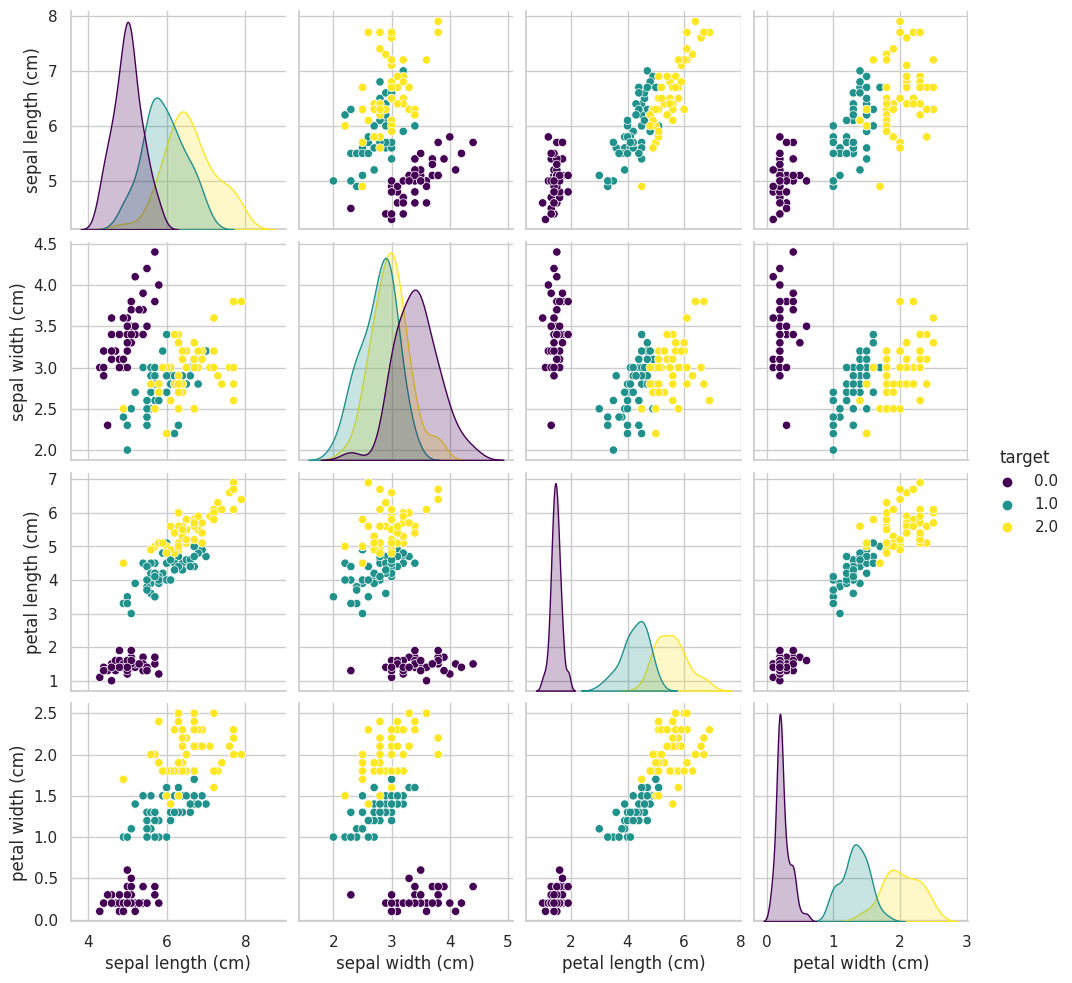

In [5]:
# Pairplot to see relationships between features
sns.pairplot(data, hue="target", palette="viridis")
plt.show()

### Distribution of Features by Class

We'll also check out the distribution of each feature by target class.

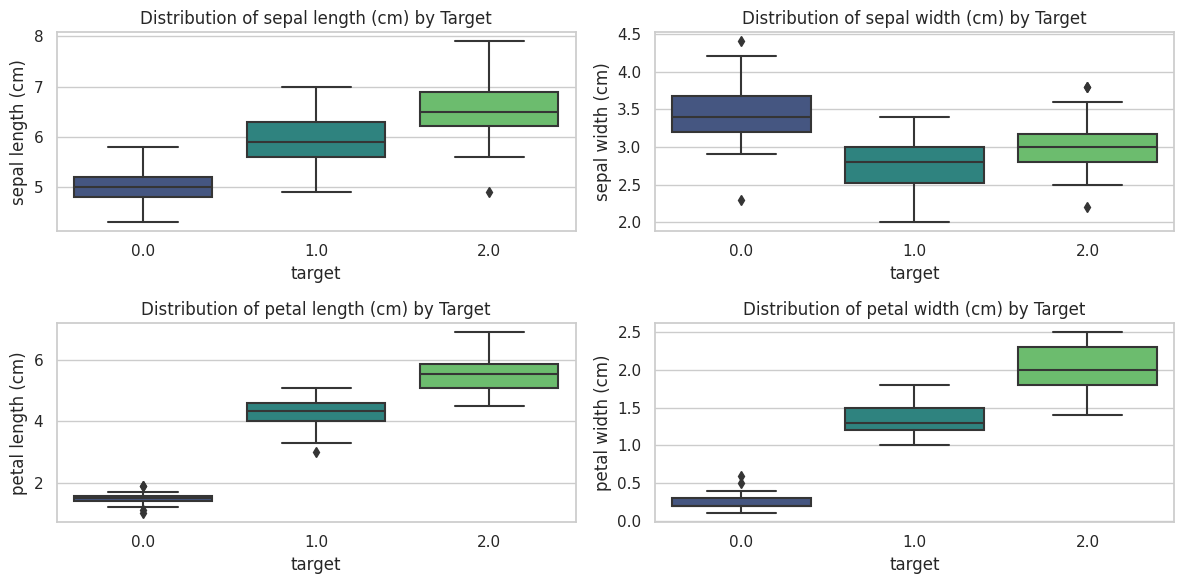

In [6]:
# Boxplot for each feature by target
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="target", y=col, data=data, palette="viridis")
    plt.title(f"Distribution of {col} by Target")
plt.tight_layout()
plt.show()

## 🔍 Step 4: Build Machine Learning Models

We’ll build two models: a **classification** model (Decision Tree Classifier) and a **regression** model (Linear Regression on synthetic continuous data).

### Classification Model: Decision Tree Classifier

We’ll use a Decision Tree Classifier to predict the target variable based on the Iris dataset features.

In [7]:
# Split data
X = data.iloc[:, :-1]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Regression Model: Linear Regression (Synthetic Data)

Let’s create some synthetic continuous data to demonstrate linear regression.

In [8]:
# Generate synthetic data for regression
np.random.seed(42)
X_syn = np.random.rand(100, 1) * 10
y_syn = 2.5 * X_syn + np.random.randn(100, 1) * 2

# Split data
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42)

# Initialize and train model
regressor = LinearRegression()
regressor.fit(X_syn_train, y_syn_train)

# Predictions and evaluation
y_syn_pred = regressor.predict(X_syn_test)
mse = mean_squared_error(y_syn_test, y_syn_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 2.523798247135461


## 📉 Step 5: Visualize Model Results

Finally, let's visualize the results of our models to better understand their performance.

### Visualize Decision Tree Classifier Predictions

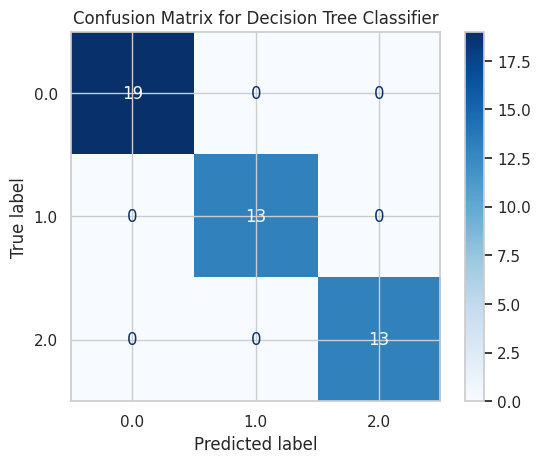

In [9]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

### Visualize Linear Regression Results

We’ll plot the true vs. predicted values for the test set.

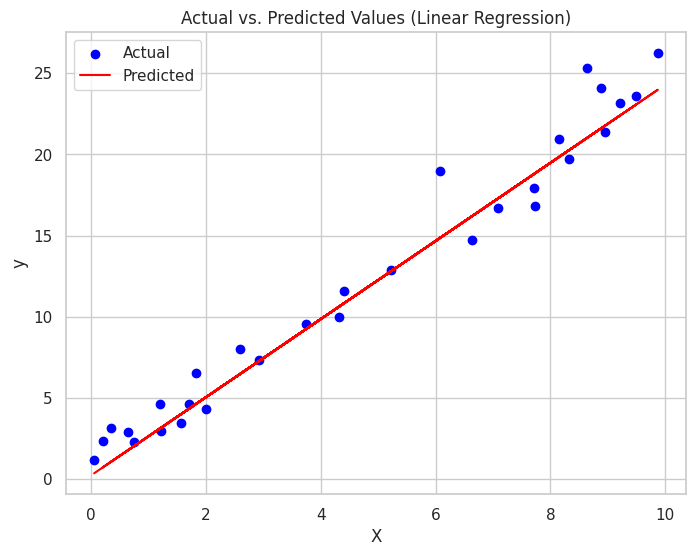

In [10]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_syn_test, y_syn_test, color='blue', label="Actual")
plt.plot(X_syn_test, y_syn_pred, color='red', label="Predicted")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()